In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [27]:
entry_df = pd.read_csv('Data_Entry_2017.csv')
print(entry_df.shape)
entry_df.head()

(112120, 11)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


In [28]:
entry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
Image Index                    112120 non-null object
Finding Labels                 112120 non-null object
Follow-up #                    112120 non-null int64
Patient ID                     112120 non-null int64
Patient Age                    112120 non-null object
Patient Gender                 112120 non-null object
View Position                  112120 non-null object
OriginalImage[Width            112120 non-null int64
Height]                        112120 non-null int64
OriginalImagePixelSpacing[x    112120 non-null float64
y]                             112120 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 9.4+ MB


In [29]:
print(len(entry_df['Patient ID'].unique()))
entry_df.describe(include=['O']) # describe include object

30805


,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
count,112120,112120,112120,112120,112120
unique,112120,790,121,2,2
top,00007576_039.png,No Finding,058Y,M,PA
freq,1,60412,3209,63340,67310


## 2. Remove strong label data
### The images listed in BBox_List_2017.csv were manually label by radiologist. These image will serve as baseline to evaluate the performance. Here I will delete all the patient id in the that appear in the strong label csv so that it will not contanimate the training progress

In [478]:
strong_df = pd.read_csv('BBox_List_2017.csv')
strong_df.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [479]:
entry_df[entry_df['Patient ID'] == 14716]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
59580,00014716_000.png,No Finding,0,14716,051Y,M,PA,2500,2048,0.168,0.168
59581,00014716_001.png,No Finding,1,14716,050Y,M,PA,2992,2991,0.143,0.143
59582,00014716_002.png,Infiltration,2,14716,051Y,M,AP,2500,2048,0.168,0.168
59583,00014716_003.png,No Finding,3,14716,051Y,M,AP,2500,2048,0.168,0.168
59584,00014716_004.png,No Finding,4,14716,051Y,M,AP,2500,2048,0.168,0.168
59585,00014716_005.png,No Finding,5,14716,051Y,M,PA,2992,2991,0.143,0.143
59586,00014716_006.png,Effusion,6,14716,053Y,M,PA,2832,2839,0.143,0.143
59587,00014716_007.png,Atelectasis|Effusion|Mass,7,14716,053Y,M,AP,3056,2544,0.139,0.139
59588,00014716_008.png,No Finding,8,14716,053Y,M,AP,3056,2544,0.139,0.139
59589,00014716_009.png,Atelectasis|Consolidation|Infiltration|Mass,9,14716,053Y,M,AP,3056,2544,0.139,0.139


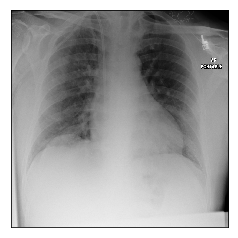

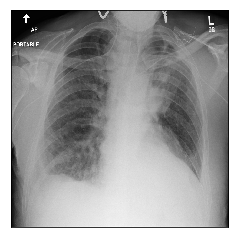

In [480]:
imshow(base_dir + '00014716_003.png')
plt.show()
imshow(base_dir + '00014716_008.png')

In [481]:
# here we get all the patient with strong labels and remove them from the common data set
patient_ids = set([image.split('_')[0].lstrip('0') for image in strong_df['Image Index'].values])
print('Strong label patient', len(patient_ids))
entry_df = entry_df[~entry_df['Patient ID'].isin(patient_ids)]
entry_df['Patient ID'].unique().shape

Strong label patient 726


(29930,)

In [482]:
entry_df.to_csv('Data_Entry_Clean.csv', index=False)

## 3. Clean up age

What is PA and AP position?
https://www.med-ed.virginia.edu/courses/rad/cxr/technique3chest.html

### 3.1 Convert Age (50Y) to int
Try this at first
``` python
import re
p = re.compile("0(.*)Y")
def convert_age(age):
    try:
        age = int(p.search(age).group(1))
    except:
        print(age)
        age = 0
    return age
```

But, 412Y, 148Y, maybe there some error while recording here, should we drop it?
```
412Y
148Y
148Y
149Y
018M
018M
020M
007M
018M
019M
019M
023M
411Y
021M
004M
413Y
412Y
001D
009M
020M
020M
013M
155Y
022M
016M
155Y
```

In [30]:
entry_df['Age Type'] = entry_df['Patient Age'].apply(lambda x: x[-1])
entry_df['Age Type'].unique()

array(['Y', 'M', 'D'], dtype=object)

In [31]:
from math import ceil
entry_df['Age'] = entry_df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
entry_df.loc[entry_df['Age Type']=='M', ['Age']] = entry_df[entry_df['Age Type'] == 'M']['Age'].apply(lambda x: ceil(x / 12.0)).astype(int)
entry_df.loc[entry_df['Age Type']=='D', ['Age']] = entry_df[entry_df['Age Type'] == 'D']['Age'].apply(lambda x: ceil(x / 365.)).astype(int)

#### 3.2 Clean up > 100 age

In [32]:
error_age_df = entry_df[entry_df['Age']>100]
error_age_df.shape

(16, 13)

In [33]:
# for patient has wrong age for 1 or 2 observation, update according to their median age
error_ids = error_age_df['Patient ID'].values
for id_ in error_ids:
    patient_df = entry_df[entry_df['Patient ID'] == id_]
    if patient_df['Patient ID'].count() > 1:
        # get average value of age
        median_age = int(ceil(patient_df[patient_df['Age'] < 100]['Age'].median()))
        entry_df.loc[(entry_df['Patient ID'] == id_) &  (entry_df['Age'] > 100), ['Age']] = median_age

In [34]:
# For remaining, set age = median age of whole set
median_age = entry_df['Age'].median()
entry_df[entry_df['Age'] > 100]['Age'] = median_age

/home/dattran/miniconda2/envs/dat/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
entry_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age Type,Age
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,Y,58
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,Y,58
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,Y,58
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,Y,81
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,Y,81


## 4. Clean up label

### 4.1 First approach:
#### For image with multiple disease labels, only get the first

In [490]:
# def extract_first_label(label):
#     disease = label.split('|')[0]
#     return disease
# entry_df['Label'] = entry_df['Finding Labels'].apply(extract_first_label)
# entry_df.head()

### 4.2 Second approach: 
#### For image with multiple disease labels, get all the labels (as in CheXNet)

Do nothing, this step will be done in one hot encoding

In [36]:
entry_df['Label'] = entry_df['Finding Labels']
entry_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age Type,Age,Label
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,Y,58,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,Y,58,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,Y,58,Cardiomegaly|Effusion
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,Y,81,No Finding
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,Y,81,Hernia


### 4.3 Third approach

#### For every patient id, set label = most common label for that patient

## 5. Drop unused & one hot encoding

In [37]:
# one hot encoding for disease
CLASS_NAMES = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
for disease in CLASS_NAMES:
    entry_df[disease] = 1 * (entry_df.Label.apply(lambda label: disease in label)) # TODO: Check this again
entry_df.drop(['Finding Labels', 'Patient Age', \
               'OriginalImage[Width', 'Height]', \
               'OriginalImagePixelSpacing[x', 'y]', \
               'Age Type', 'Label'], axis=1, inplace=True)
gender_map = {'M': 1, 'F': 0}
entry_df['Patient Gender'] = entry_df['Patient Gender'].map(gender_map)
view_position_map = {'PA': 1, 'AP': 0}
entry_df['View Position'] = entry_df['View Position'].map(view_position_map)
entry_df.head()

,Image Index,Follow-up #,Patient ID,Patient Gender,View Position,Age,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,00000001_000.png,0,1,1,1,58,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,1,1,58,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,00000001_002.png,2,1,1,1,58,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,2,1,1,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,0,3,0,1,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
entry_df.to_csv('Data_Entry_Clean.csv')